# Introduction to H2O's GLM using Lending Club Loan Data

[H2O](http://h2o-release.s3.amazonaws.com/h2o/latest_stable.html) is a scalable, distributed machine learning platform with interfaces in Python, R, and Flow (Web).

## The H2O Python Module

The [H2O Python Module](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html) module provides access to H2O clusters and uses conventions from [scikit-learn](http://scikit-learn.org) and [pandas](https://pandas.pydata.org). Installation instructions for this module are available on the [Install in Python](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html#install-in-python) section of H2O's on-line documentation.

In [1]:
import h2o

In [2]:
help(h2o)

Help on package h2o:

NAME
    h2o - :mod:`h2o` -- module for using H2O services.

DESCRIPTION
    (please add description).

PACKAGE CONTENTS
    assembly
    astfun
    automl (package)
    backend (package)
    cross_validation
    demos
    display
    estimators (package)
    exceptions
    expr
    expr_optimizer
    frame
    grid (package)
    group_by
    h2o
    job
    model (package)
    schemas (package)
    transforms (package)
    two_dim_table
    utils (package)

FUNCTIONS
    api(endpoint, data=None, json=None, filename=None, save_to=None)
        Perform a REST API request to a previously connected server.
        
        This function is mostly for internal purposes, but may occasionally be useful for direct access to
        the backend H2O server. It has same parameters as :meth:`H2OConnection.request <h2o.backend.H2OConnection.request>`.
    
    as_list(data, use_pandas=True, header=True)
        Convert an H2O data object into a python-specific object.
       

## Starting and Connecting to an H2O Cluster

The [h2o](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html#h2o-cluster-inspection) Python module contains the [`init`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/h2o.html?highlight=init#h2o.init) function to connecting and potentially starting a local H2O cluster. It also has the [`connect`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/h2o.html?highlight=connect#h2o.connect) function for connecting to an existing H2O cluster, remote or local.

In [3]:
h2o.init(max_mem_size = "6g") # use h2o.connect() for an existing h2o cluster

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/wk/m00ydfj52f9fl7zvx5cjztgc0000gn/T/tmpiqqupgi9
  JVM stdout: /var/folders/wk/m00ydfj52f9fl7zvx5cjztgc0000gn/T/tmpiqqupgi9/h2o_patrickaboyoun_started_from_python.out
  JVM stderr: /var/folders/wk/m00ydfj52f9fl7zvx5cjztgc0000gn/T/tmpiqqupgi9/h2o_patrickaboyoun_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.3
H2O cluster version age:,1 month and 17 days
H2O cluster name:,H2O_from_python_patrickaboyoun_3fq61x
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


## Data in H2O

### Data Import

### The H2OFrame

Data in an H2O cluster are represented as [`H2OFrame`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html) objects in Python. These objects have pandas-like methods for data manipulations. Two of the most important attributes of these objects are [`col_names`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=col_names#h2o.frame.H2OFrame.col_names) attribute, which contain the column names, and
[`types`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=types#h2o.frame.H2OFrame.types), which contain the data types for each of the columns. A third important attribute is the [`frame_id`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=frame_id#h2o.frame.H2OFrame.frame_id), which is the key for the H2OFrame within the H2O cluster.

In the case of the lending club loan data, the binary outcome, "bad_loan", was interpreted as integer and so is coerced to a categorical / enum / factor using the [`asfactor`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=asfactor#h2o.frame.H2OFrame.asfactor) method.

In [5]:
type(train)

h2o.frame.H2OFrame

In [6]:
help(h2o.H2OFrame)

Help on class H2OFrame in module h2o.frame:

class H2OFrame(builtins.object)
 |  Primary data store for H2O.
 |  
 |  H2OFrame is similar to pandas' ``DataFrame``, or R's ``data.frame``. One of the critical distinction is that the
 |  data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus
 |  ``H2OFrame`` represents a mere handle to that data.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self)
 |      # unops
 |  
 |  __add__(self, rhs)
 |      # Binary operations
 |  
 |  __and__(self, rhs)
 |  
 |  __contains__(self, lhs)
 |  
 |  __div__(self, rhs)
 |  
 |  __eq__(self, rhs)
 |      Return self==value.
 |  
 |  __float__(self)
 |  
 |  __floordiv__(self, rhs)
 |  
 |  __ge__(self, rhs)
 |      Return self>=value.
 |  
 |  __getitem__(self, item)
 |      Frame slicing, supports row and column slicing.
 |      
 |      :param item: selector of a subframe. This can be one of the following:
 |      
 |          - an int, indicating se

In [7]:
train.col_names

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'revol_util',
 'total_acc',
 'bad_loan',
 'longest_credit_length',
 'verification_status']

In [8]:
train.types

{'loan_amnt': 'int',
 'term': 'enum',
 'int_rate': 'real',
 'emp_length': 'int',
 'home_ownership': 'enum',
 'annual_inc': 'real',
 'purpose': 'enum',
 'addr_state': 'enum',
 'dti': 'real',
 'delinq_2yrs': 'int',
 'revol_util': 'real',
 'total_acc': 'int',
 'bad_loan': 'int',
 'longest_credit_length': 'int',
 'verification_status': 'enum'}

In [9]:
print(train.frame_id)

loan_train


In [10]:
train["bad_loan"] = train["bad_loan"].asfactor()

In [11]:
print(train.frame_id)

py_1_sid_b77f


### Exploratory Data Analysis in H2O

#### A Quick Look at the Target Variable

We will begin our exploration with a quick look at the frequency of bad loan status in the data using H2OFrame's [`table`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=table#h2o.frame.H2OFrame.table) method. Since the `table` method returns an H2OFrame, it is converted to a pandas DataFrame using the [`as_data_frame`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=as_data_frame#h2o.frame.H2OFrame.as_data_frame) method. The bad loan rate for customers in this data set is roughly 18%.

In [12]:
tbl = train["bad_loan"].table()
tbl = tbl.as_data_frame()

print(tbl)
print("\nFraction of bad_loan = {:0.4f}".format(tbl[tbl["bad_loan"] == 1]["Count"].values[0] / tbl["Count"].sum()))

   bad_loan   Count
0         0  133971
1         1   30016

Fraction of bad_loan = 0.1830


#### A Quick Look at the Predictor Variables

In preparation for our modeling bad loans, we can turn to H2OFrame's [`describe`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=describe#h2o.frame.H2OFrame.describe) method to provide summary statistics for each of the columns in the data set, which includes minimums, maximums, means, and standard deviations.

Given the nature of this data, it will also be useful to explore the skewness and shape of the numeric data, [`columns_by_type("numeric")`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=columns_by_type#h2o.frame.H2OFrame.columns_by_type), using H2OFrame's [`skewness`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=skewness#h2o.frame.H2OFrame.skewness) and [`kurtosis`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=kurtosis#h2o.frame.H2OFrame.kurtosis) methods. These aspects of the data are shown graphically using H2OFrame's [`hist`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/frame.html?highlight=hist#h2o.frame.H2OFrame.hist) method to produce histograms for numeric columns.

As the summaries below show, most of the numeric columns contain skewed data that we will address during feature engineering.

In [13]:
train.describe()

Rows:163987
Cols:15




,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
type,int,enum,real,int,enum,real,enum,enum,real,int,real,int,enum,int,enum
mins,500.0,,5.42,0.0,,1896.0,,,0.0,0.0,0.0,1.0,,0.0,
mean,13074.169141456336,,13.715904065566173,5.68435293299533,,71915.67051974901,,,15.881530121290117,0.2273570060625282,54.07917280242258,24.579733834274638,,14.854273655448353,
maxs,35000.0,,26.06,10.0,,7141778.0,,,39.99,29.0,150.70000000000002,118.0,,65.0,
sigma,7993.556188734649,,4.391939870545795,3.6106637311002365,,59070.915654918244,,,7.587668224192549,0.6941679229284182,25.285366766770505,11.685190365910659,,6.947732922546696,
zeros,0,,0,14248,,0,,,270,139459,1562,0,,11,
missing,0,0,0,5804,0,4,0,0,0,29,193,29,0,29,0
0,5000.0,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500.0,60 months,15.27,0.0,RENT,30000.0,car,GA,1.0,0.0,9.4,4.0,1,12.0,verified
2,2400.0,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified


In [14]:
{ train.col_names[int(j)] : train[int(j)].skewness(na_rm = True)[0] for j in train.columns_by_type("numeric") }

{'loan_amnt': 0.8753344731629872,
 'int_rate': 0.3278618866458746,
 'emp_length': -0.1054415215350723,
 'annual_inc': 35.490175276568756,
 'dti': 0.18215840060680447,
 'delinq_2yrs': 5.961064174114161,
 'revol_util': -0.24909373161407267,
 'total_acc': 0.7672568687389832,
 'longest_credit_length': 1.1320402013276156}

In [15]:
{ train.col_names[int(j)] : train[int(j)].kurtosis(na_rm = True)[0] for j in train.columns_by_type("numeric") }

{'loan_amnt': 3.2288978583663726,
 'int_rate': 2.6791986218866417,
 'emp_length': 1.597127424673438,
 'annual_inc': 3270.723574206677,
 'dti': 2.47660889447404,
 'delinq_2yrs': 75.67871449257943,
 'revol_util': 2.1979478719219996,
 'total_acc': 3.6270448687190786,
 'longest_credit_length': 4.962164722357427}

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

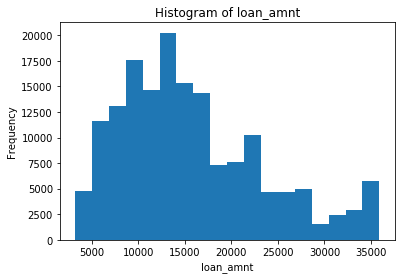

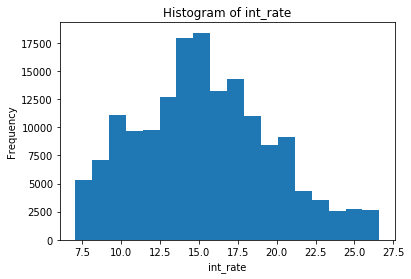

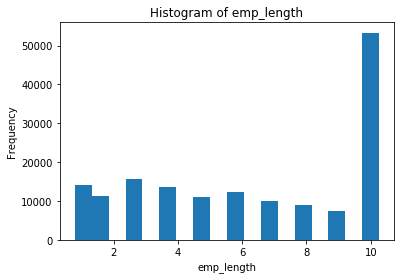

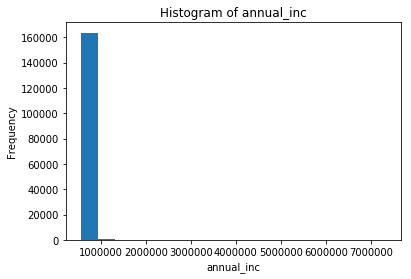

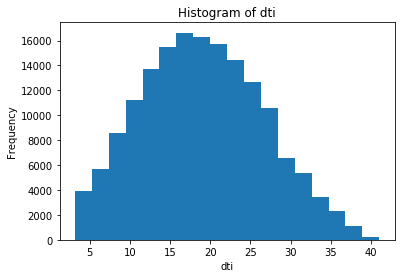

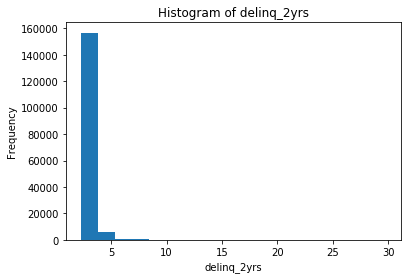

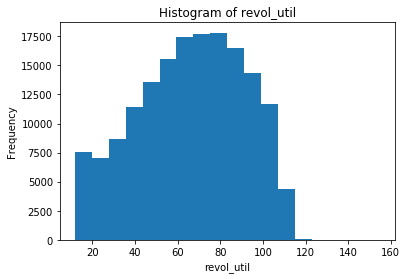

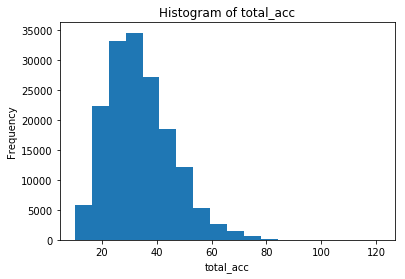

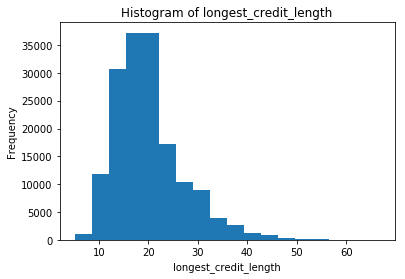

In [17]:
for j in train.columns_by_type("numeric"):
    train[int(j)].hist()
plt.show()

### Feature Engineering in H2O

## Supervised Learning in H2O

This exploration will employ six different supervised learning techniques:

1. [Generalized Linear Model](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogeneralizedlinearestimator)
1. [Random Forest](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2orandomforestestimator)
1. [Gradient Boosting Machine](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogradientboostingestimator)
1. [Multilayer Perceptron (Deep Learning)](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2odeeplearningestimator)
1. [Stacked Ensembles](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ostackedensembleestimator)
1. [Automatic Machine Learning (AutoML)](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

H2O has two other superviesed learning techiques, [Naive Bayes Classifier](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2onaivebayesestimator) and [eXtreme Gradient Boosting (XGBoost)](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oxgboostestimator), that are left for the reader to explore outside of this script.

Given we only have 163987 rows of data, we will use cross-validation to detect overfitting rather than creating a separate validation split.

In [102]:
print("Response = " + y)
print("Predictors (Orig) = " + str(x_orig))
print("Predictors (Trans) = " + str(x_trans))

Response = bad_loan
Predictors (Orig) = ['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length', 'verification_status']
Predictors (Trans) = ['emp_length', 'loan_amnt_core', 'loan_amnt_delta', 'term_60months', 'emp_length_missing', 'home_ownership_3cat', 'annual_inc_core', 'annual_inc_delta', 'te_purpose', 'te_addr_state', 'dti_core', 'dti_delta', 'delinq_2yrs_core', 'delinq_2yrs_delta', 'revol_util_0', 'revol_util_core', 'revol_util_delta', 'total_acc_core', 'total_acc_delta', 'longest_credit_length_core', 'longest_credit_length_delta', 'verified']


### Generalized Linear Model : Logistic Regression

#### Initial Models

Following standard convention for binary classification exercises, we will start with logistic regression. From Python, H2O uses a scikit-learn like [`H2OGeneralizedLinearEstimator`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html?highlight=h2ogeneralizedlinearestimator#h2o.estimators.glm.H2OGeneralizedLinearEstimator) to fit a couple of models. The first model we will fit uses the original set of predictors and the second model uses the engineered features. As is expected, the logistic regression model containing the engineered features have a lower cross-validated logloss and a higher cross-validated AUC than the model with the original features.

In [103]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [104]:
help(H2OGeneralizedLinearEstimator)

Help on class H2OGeneralizedLinearEstimator in module h2o.estimators.glm:

class H2OGeneralizedLinearEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Generalized Linear Modeling
 |  
 |  Fits a generalized linear model, specified by a response variable, a set of predictors, and a
 |  description of the error distribution.
 |  
 |  A subclass of :class:`ModelBase` is returned. The specific subclass depends on the machine learning task
 |  at hand (if it's binomial classification, then an H2OBinomialModel is returned, if it's regression then a
 |  H2ORegressionModel is returned). The default print-out of the models is shown, but further GLM-specific
 |  information can be queried out of the object. Upon completion of the GLM, the resulting object has
 |  coefficients, normalized coefficients, residual/null deviance, aic, and a host of model metrics including
 |  MSE, AUC (for logistic regression), degrees of freedom, and confusion matrices.
 |  
 |  Method resolution order:
 |  

In [105]:
glm_orig_0 = H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True,
                                           nfolds = cv_nfolds, fold_column = "cv_fold")
glm_trans_0 = H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True,
                                            nfolds = cv_nfolds, fold_column = "cv_fold")

In [106]:
glm_orig_0.train(x = x_orig, y = y, training_frame = train, model_id = "bad_loan_glm_orig_0")
glm_trans_0.train(x = x_trans, y = y, training_frame = train, model_id = "bad_loan_glm_trans_0")

glm Model Build progress: |███████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%


In [107]:
print("Log Loss_GLM(orig)  = {:0.4f}".format(glm_orig_0.logloss(xval = True)))
print("Log Loss_GLM(trans) = {:0.4f}".format(glm_trans_0.logloss(xval = True)))

Log Loss_GLM(orig)  = 0.4477
Log Loss_GLM(trans) = 0.4457


In [108]:
print("AUC_GLM(orig)  = {:0.4f}".format(glm_orig_0.auc(xval = True)))
print("AUC_GLM(trans) = {:0.4f}".format(glm_trans_0.auc(xval = True)))

AUC_GLM(orig)  = 0.6738
AUC_GLM(trans) = 0.6772


#### Regularization Path

The [`H2OGeneralizedLinearEstimator.getGLMRegularizationPath`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html?highlight=getglmregularizationpath#h2o.estimators.glm.H2OGeneralizedLinearEstimator.getGLMRegularizationPath) method extracts the regularization path from the lambda search.

In [109]:
reg_path = H2OGeneralizedLinearEstimator.getGLMRegularizationPath(glm_trans_0)

In [110]:
print(reg_path.keys())

dict_keys(['lambdas', 'explained_deviance_train', 'explained_deviance_valid', 'coefficients', 'coefficients_std'])


In [111]:
reg_path_df = \
    pd.concat([pd.DataFrame({'lambdas': reg_path['lambdas'],
                             'explained_deviance_train': reg_path['explained_deviance_train']}),
               pd.DataFrame(reg_path['coefficients_std'])], axis = 1)
reg_path_df

,lambdas,explained_deviance_train,Intercept,annual_inc_core,annual_inc_delta,delinq_2yrs_core,delinq_2yrs_delta,dti_core,dti_delta,emp_length,...,longest_credit_length_delta,revol_util_0,revol_util_core,revol_util_delta,te_addr_state,te_purpose,term_60months,total_acc_core,total_acc_delta,verified
0,0.114482,-1.554312e-13,-1.495893,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.104312,2.907636e-03,-1.496091,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000
2,0.095045,5.458983e-03,-1.496641,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.048511,0.000000,0.000000,0.000000
3,0.086601,7.687483e-03,-1.497478,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.070564,0.000000,0.000000,0.000000
4,0.078908,9.966709e-03,-1.498416,0.000000,0.0,0.000000,0.0,0.002666,0.000000,0.000000,...,0.000000,0.000000,0.001528,0.0,0.000000,0.000000,0.091097,0.000000,0.000000,0.000000
5,0.071898,1.527707e-02,-1.500107,-0.016700,0.0,0.000000,0.0,0.015053,0.000000,0.000000,...,0.000000,0.000000,0.017942,0.0,0.000000,0.000000,0.110452,0.000000,0.000000,0.000000
6,0.065511,2.018967e-02,-1.502328,-0.036021,0.0,0.000000,0.0,0.026017,0.000000,0.000000,...,0.000000,0.000000,0.033752,0.0,0.000000,0.000000,0.129076,0.000000,0.000000,0.000000
7,0.059691,2.447512e-02,-1.505095,-0.054450,0.0,0.000000,0.0,0.036161,0.000000,0.000000,...,0.000000,0.000000,0.048754,0.0,0.000000,0.000000,0.146518,0.000000,0.000000,0.000000
8,0.054388,2.820458e-02,-1.508291,-0.071992,0.0,0.000000,0.0,0.045541,0.000000,0.000000,...,0.000000,0.000000,0.062966,0.0,0.000000,0.000000,0.162835,0.000000,0.000000,0.000000
9,0.049556,3.179152e-02,-1.511836,-0.088584,0.0,0.000000,0.0,0.054138,0.000000,0.000000,...,0.000000,0.000000,0.076372,0.0,0.000000,0.006896,0.177920,0.000000,0.000000,0.000000


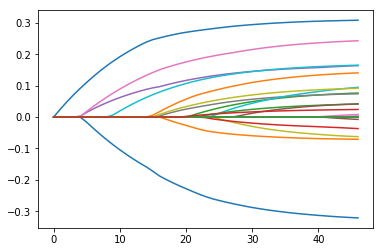

In [112]:
plt.plot(reg_path_df.iloc[:, 3:27])
plt.show()

#### Grid Search Over Hyper-Parameters

In general, machine learning models require hyper-parameter tuning to capture the signal in the data without overfitting the noise. To aid in this effort, H2O provides and [`H2OGridSearch`](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html?highlight=h2ogridsearch#h2o.grid.grid_search.H2OGridSearch) framework to automate hyper-parameter exploration.

In the context of logistic regression, the most important hyper-parameter is `alpha`, which balances the importance given to L1 and L2 regularization on the coefficient estimates. When `alpha = 0` only L2 regularization is used (ridge regression), when `alpha = 1` only L1 regularization is used (Least Absolute Shrinkage and Selection Operator (LASSO)), and when `alpha` is somewhere in-between a combination of the two are used (elastic-net).

In [113]:
from h2o.grid.grid_search import H2OGridSearch

In [114]:
help(H2OGridSearch)

Help on class H2OGridSearch in module h2o.grid.grid_search:

class H2OGridSearch(h2o.utils.backward_compatibility.BackwardsCompatibleBase)
 |  Grid Search of a Hyper-Parameter Space for a Model
 |  
 |  :param model: The type of model to be explored initialized with optional parameters that will be
 |      unchanged across explored models.
 |  :param hyper_params: A dictionary of string parameters (keys) and a list of values to be explored by grid
 |      search (values).
 |  :param str grid_id: The unique id assigned to the resulting grid object. If none is given, an id will
 |      automatically be generated.
 |  :param search_criteria:  A dictionary of directives which control the search of the hyperparameter space.
 |      The default strategy "Cartesian" covers the entire space of hyperparameter combinations. Specify the
 |      "RandomDiscrete" strategy to get random search of all the combinations of your hyperparameters.
 |      RandomDiscrete should usually be combined with at 

In [115]:
glm_hyper_parameters = {"alpha": [0.05, 0.5, 0.95]}

j = 0
while j < len(x_trans):
    j = j + 1
    glm_grid = H2OGridSearch(H2OGeneralizedLinearEstimator(family = "binomial", lambda_search = True,
                                                           fold_column = "cv_fold",
                                                           keep_cross_validation_predictions = True,
                                                           max_active_predictors = j),
                             glm_hyper_parameters)
    glm_grid.train(x = x_trans, y = y, training_frame = train, grid_id = "bad_loan_glm_grid")

glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |████████████████████████████████████████████████| 100%
glm Grid Build progress: |██

In [116]:
glm_grid.show()

        alpha                   model_ids              logloss
0      [0.05]  bad_loan_glm_grid_model_60  0.44575379665894127
1      [0.05]  bad_loan_glm_grid_model_63   0.4457543478932118
2      [0.05]  bad_loan_glm_grid_model_57   0.4457581913003404
3      [0.95]  bad_loan_glm_grid_model_53  0.44577010351867563
4      [0.95]  bad_loan_glm_grid_model_56   0.4457705343610416
5      [0.95]  bad_loan_glm_grid_model_62   0.4457705343610416
6      [0.95]  bad_loan_glm_grid_model_59   0.4457705343610416
7      [0.95]  bad_loan_glm_grid_model_65   0.4457705343610416
8       [0.5]  bad_loan_glm_grid_model_61  0.44577054890084056
9       [0.5]  bad_loan_glm_grid_model_55  0.44577054890084056
10      [0.5]  bad_loan_glm_grid_model_58  0.44577054890084056
11      [0.5]  bad_loan_glm_grid_model_64  0.44577054890084056
12     [0.95]  bad_loan_glm_grid_model_47   0.4457708230897978
13      [0.5]  bad_loan_glm_grid_model_46   0.4457713492545339
14     [0.95]  bad_loan_glm_grid_model_50   0.445771429

In [117]:
sorted((v, k) for (k,v) in glm_grid.aic(xval = True).items())

[(146235.23993205334, 'bad_loan_glm_grid_model_47'),
 (146235.4125004065, 'bad_loan_glm_grid_model_46'),
 (146237.43881260048, 'bad_loan_glm_grid_model_50'),
 (146237.67147915644, 'bad_loan_glm_grid_model_49'),
 (146239.00393143413, 'bad_loan_glm_grid_model_53'),
 (146239.09703353784, 'bad_loan_glm_grid_model_57'),
 (146239.65570541957, 'bad_loan_glm_grid_model_60'),
 (146239.83649592823, 'bad_loan_glm_grid_model_63'),
 (146239.87749800668, 'bad_loan_glm_grid_model_52'),
 (146241.14523652825, 'bad_loan_glm_grid_model_56'),
 (146241.14523652825, 'bad_loan_glm_grid_model_59'),
 (146241.14523652825, 'bad_loan_glm_grid_model_62'),
 (146241.14523652825, 'bad_loan_glm_grid_model_65'),
 (146241.15000520425, 'bad_loan_glm_grid_model_55'),
 (146243.15000520425, 'bad_loan_glm_grid_model_58'),
 (146243.15000520425, 'bad_loan_glm_grid_model_61'),
 (146243.15000520425, 'bad_loan_glm_grid_model_64'),
 (146244.23290274042, 'bad_loan_glm_grid_model_51'),
 (146246.5621521726, 'bad_loan_glm_grid_model_5

In [118]:
glm_best = glm_grid.models[0]
"Number of non-zero coefs = {}".format(sum(x != 0 for x in glm_best.coef().values()))

'Number of non-zero coefs = 22'

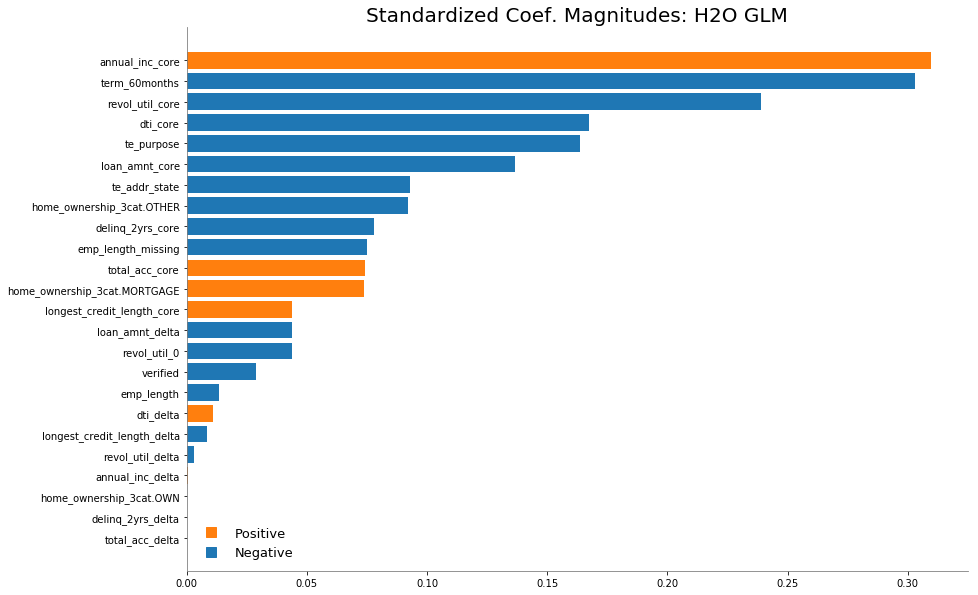

In [119]:
glm_best.std_coef_plot()

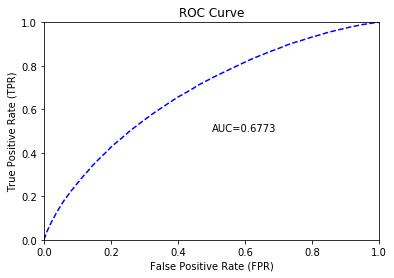

In [120]:
glm_best.model_performance(xval = True).plot()

In [121]:
glm_best.predict(train)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.96999,0.03001
0,0.807572,0.192428
0,0.866912,0.133088
0,0.952953,0.0470467
0,0.901452,0.0985483
1,0.787788,0.212212
1,0.650202,0.349798
1,0.685619,0.314381
1,0.768092,0.231908
0,0.828937,0.171063
